<a href="https://colab.research.google.com/github/arpan2233/Deep-Learning/blob/main/Hard_Soft_Margin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install numpy matplotlib scikit-learn


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [4]:
# Generate linearly separable data
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Convert labels from {0,1} to {-1,1} (SVM uses -1 and 1)
y = np.where(y == 0, -1, 1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train SVM with a large C value (Hard Margin)
svm_hard = SVC(kernel='linear', C=1e6)
svm_hard.fit(X_train, y_train)

# Print accuracy
print("Hard Margin SVM Accuracy:", svm_hard.score(X_test, y_test))


Hard Margin SVM Accuracy: 1.0


In [6]:
# Train SVM with a smaller C value (Soft Margin)
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X_train, y_train)

# Print accuracy
print("Soft Margin SVM Accuracy:", svm_soft.score(X_test, y_test))


Soft Margin SVM Accuracy: 1.0


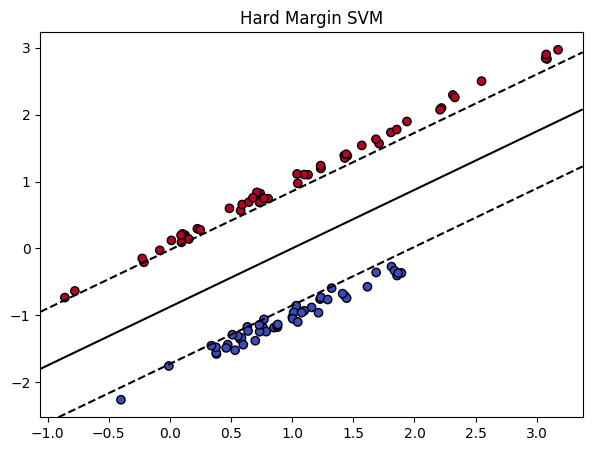

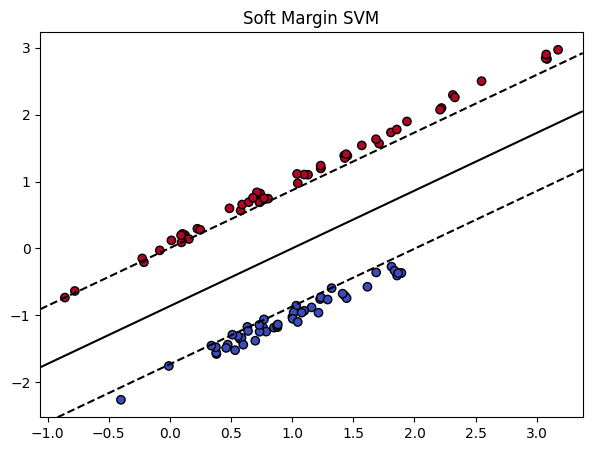

In [7]:
def plot_svm_boundary(model, X, y, title):
    plt.figure(figsize=(7,5))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))

    # Get model predictions
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contour(xx, yy, Z, colors='black', levels=[-1, 0, 1], linestyles=['--', '-', '--'])

    plt.title(title)
    plt.show()

# Plot Hard Margin SVM
plot_svm_boundary(svm_hard, X, y, "Hard Margin SVM")

# Plot Soft Margin SVM
plot_svm_boundary(svm_soft, X, y, "Soft Margin SVM")
